<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/Copy_of_Ejercicio_sobre_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo /Codigo /week8/cust_seg.csv'
df = pd.read_csv(filename)
#df = wine[['malic_acid', 'flavanoids']]
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [5]:
df1 = df[['Unnamed: 0','Age','Years Employed','Income','Defaulted','DebtIncomeRatio']]
df1

,Unnamed: 0,Age,Years Employed,Income,Defaulted,DebtIncomeRatio
0,0,41,6,19,0.0,6.3
1,1,47,26,100,0.0,12.8
2,2,33,10,57,1.0,20.9
3,3,29,4,19,0.0,6.3
4,4,47,31,253,0.0,7.2
...,...,...,...,...,...,...
845,845,27,5,26,NaN,6.8
846,846,28,7,34,0.0,7.0
847,847,25,0,18,1.0,33.4
848,848,32,12,28,0.0,2.9


In [6]:
 df1.isnull().sum()

Unnamed: 0           0
Age                  0
Years Employed       0
Income               0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [7]:
df1 = df1.fillna(0)

In [8]:
df1.isnull().sum()

Unnamed: 0         0
Age                0
Years Employed     0
Income             0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Defaulted        850 non-null    float64
 5   DebtIncomeRatio  850 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 40.0 KB


In [10]:
# Instancia de escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df1 = scaler.fit_transform(df1)

Text(0.5, 0, 'Age')

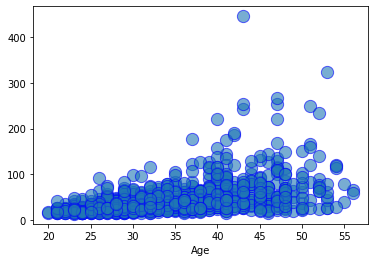

In [11]:
# Visualizar datos
plt.scatter(df1['Age'], df1['Income'], s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.xlabel('Age')


In [12]:
# Instanciar KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df1)

KMeans(n_clusters=2)

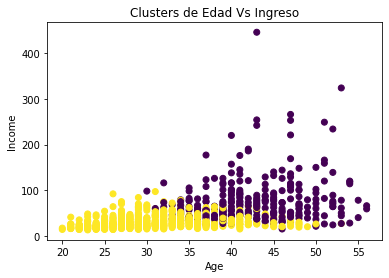

In [13]:
# Guarde las etiquetas del clúster en el marco de datos 
df1['cluster'] = kmeans.labels_
# Visualiza los clusters
plt.scatter(df1['Age'], df1['Income'], c = df1['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters de Edad Vs Ingreso');

Text(0.5, 0, 'Age')

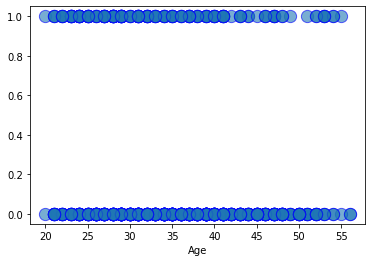

In [14]:
# Visualizar datos
plt.scatter(df1['Age'], df1['Defaulted'], s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.xlabel('Age')

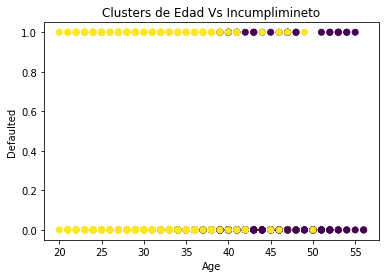

In [15]:
# Guarde las etiquetas del clúster en el marco de datos 
df1['cluster2'] = kmeans.labels_
# Visualiza los clusters
plt.scatter(df1['Age'], df1['Defaulted'], c = df1['cluster2'])
plt.xlabel('Age')
plt.ylabel('Defaulted')
plt.title('Clusters de Edad Vs Incumplimineto');

Text(0.5, 0, 'Age')

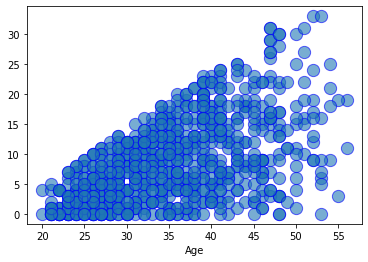

In [16]:
# Visualizar datos
plt.scatter(df1['Age'], df1['Years Employed'], s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.xlabel('Age')

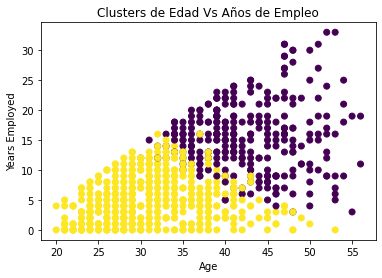

In [17]:
# Guarde las etiquetas del clúster en el marco de datos 
df1['cluster3'] = kmeans.labels_
# Visualiza los clusters
plt.scatter(df1['Age'], df1['Years Employed'], c = df1['cluster3'])
plt.xlabel('Age')
plt.ylabel('Years Employed')
plt.title('Clusters de Edad Vs Años de Empleo');

Exites mas oportunidad de para orientar las campañas en el segmento de 30 a 35 años 

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [19]:
# Instanciar Escalador Estándar  
scaler = StandardScaler()
# Ajustar y transformar los datos
scaled_df = scaler.fit_transform(df1)

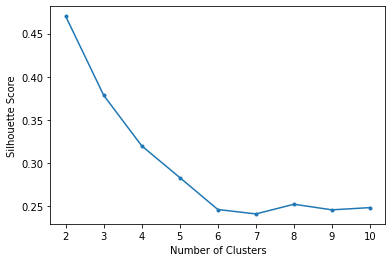

In [20]:
# Visualiza diferentes puntuaciones de silueta
# Guardar las puntuaciones de silueta para varios números de clúster en la lista
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [21]:
# Ajustar el modelo kmeans con 2 grupos y mostrar la puntuación de silueta
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.47009961964565367

In [22]:
# Ver puntuación de silueta DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)
silhouette_score(scaled_df, dbs.labels_)

-0.2433213869876379

In [23]:
# Crear una instancia y ajustar la agrupación en clústeres: esto se hace en un solo paso para DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)

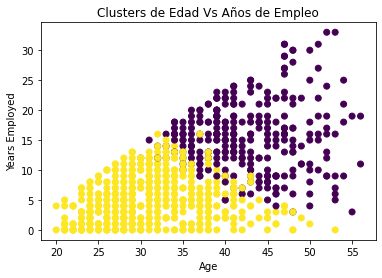

In [24]:
# Guardar las etiquetas del clúster en el marco de datos
df1['cluster2'] = dbs.labels_
# Visualizar los clústers
plt.scatter(df1['Age'], df1['Years Employed'], c = df1['cluster3'])
plt.xlabel('Age')
plt.ylabel('Years Employed')
plt.title('Clusters de Edad Vs Años de Empleo');